### Backtesting on synthetic simulation using empirical data

In [1]:
import numpy as np
import pandas as pd
from FinancialMachineLearning.backtest.backtest_synthetic_data import *
import yfinance as yf

start_date = '2020-01-01'
end_date = '2024-01-01'

apple = yf.download('AAPL', start = start_date, end = end_date)
apple.Close.head()

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64

In [28]:
params = get_OU_params(apple.Close)

In [29]:
print(f"expected phi : {params['phi'] : .4f}")
print(f"expected forecast : {params['forecast'] : .4f}")
print(f"sigma : {params['sigma'] : .4f}")
print(f"half life : {params['half life'] : .4f}")

expected phi :  0.9955
expected forecast :  4.9146
sigma :  0.0211
half life :  152.9182


In [10]:
rPT = rSLm = np.linspace(0, 10, 21)
coeffs = {'forecast' : params['forecast'], 'hl' : params['half life'], 'sigma' : params['sigma']}

output = synthetic_simulation(
    coeffs = coeffs, 
    nIter = 1e5, 
    maxHP = 100, 
    rPT = rPT, 
    rSLm = rSLm
)

441it [35:18,  4.80s/it]


In [11]:
sr_test = get_sharpe_grid(output, rPT, rSLm)

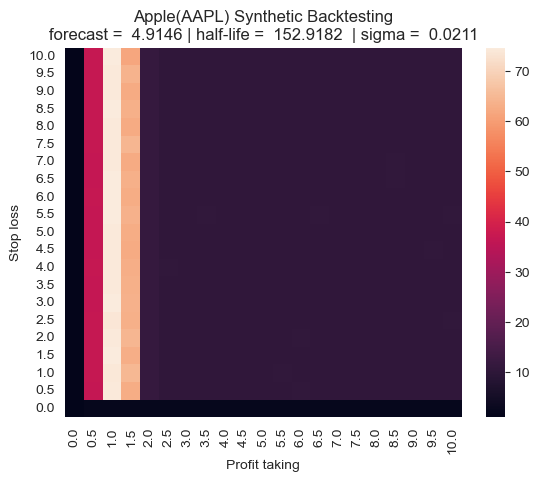

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(sr_test)
plt.title(f"Apple(AAPL) Synthetic Backtesting\nforecast = {coeffs['forecast'] : .4f} | half-life = {coeffs['hl'] : .4f}  | sigma = {coeffs['sigma'] : .4f}")
plt.xlabel("Profit taking")
plt.ylabel("Stop loss")
plt.grid(False)
plt.show()

In [21]:
# sr_test.to_csv('apple_synthetic_backtesting.csv')